# Polarization
Following [Detlefs[2012]](http://dx.doi.org/10.1140/epjst/e2012-01630-3) the electric field of a monochromatic plane wave can be described as

$$
\begin{equation}
\begin{split}
\vec{E}(t,\vec{x}) =& \Re[(V_0\hat{e}_0 + V_1\hat{e}_1)e^{i(\vec{k}\cdot\vec{x} - \omega t)}]\\
\hat{e}_0 =& \hat{e}_1\times\hat{e}_2\\
\hat{e}_1 =& \hat{e}_2\times\hat{e}_0\\
\hat{e}_2 =&\hat{k}
\end{split}
\end{equation}    
$$

The complex random vector $\vec{V}=[V_0,V_1]^T$ is known as the Jones vector. The state of polarization of this field refers to its second order statistics, which can be expressed as the expectation of the outer product of the Jones vector with itself ($x^*$ denotes the complex conjugate of $x$ and $\langle x\rangle$ the expectation)

$$
\begin{equation}
C = \langle\vec{V}\otimes\vec{V}\rangle=
\begin{bmatrix} \langle V_0 V_0^*\rangle & \langle V_0 V_1^*\rangle\\
\langle V_1 V_0^*\rangle & \langle V_1 V_1^*\rangle
\end{bmatrix}
\end{equation}    
$$

Under Stokes' formalism the coherency matrix $C$ is decomposed as follows

$$
\begin{equation}
C = \frac{1}{2}\begin{bmatrix} S_0+S_1 & S_2-iS_3\\
S_2+iS_3 & S_0-S_1
\end{bmatrix}
\end{equation}    
$$

The Poynting vector can be written as function of the Jones vector:

$$
\begin{equation}
\begin{split}
\vec{P}(t,\vec{x})=& \frac{1}{\mu_0}\vec{E}(t,\vec{x})\times\vec{B}(t,\vec{x})\\
=& \frac{1}{c\mu_0}\left(\vec{E}(t,\vec{x})\cdot\vec{E}(t,\vec{x})\right)\hat{k}\\
=& \frac{c\epsilon_0}{2}\left( \Re[\vec{V}\cdot\vec{V}^*] + \Re[\vec{V}\cdot\vec{V}e^{2i(\vec{k}\cdot\vec{x} - \omega t)} ]  \right)\hat{k}\\
=& \frac{c\epsilon_0}{2}\left(
\begin{bmatrix}
\left\lvert V_0\right\rvert^2\\
\left\lvert V_1\right\rvert^2
\end{bmatrix}
+
\begin{bmatrix}
\left\lvert V_0\right\rvert^2 \cos(2(\phi_0+\alpha))\\
\left\lvert V_1\right\rvert^2 \cos(2(\phi_1+\alpha))
\end{bmatrix}
\right)\hat{k}\\
\alpha=&\vec{k}\cdot\vec{x} - \omega t\\
\end{split}
\end{equation}
$$

where we used $\cos 2x = 2\cos^2 x -1$ and SI units $V/m$ for $\left\lvert V_j\right\rvert$.

For an isolated wave $\vec{V}\in\mathbb{C}^2$, the intensity (SI units: $W/m^2$) can be obtained by time averaging the Poynting vector (second term vanishes):

$$
\begin{equation}
\begin{split}
I(\vec{x})=&{\left\langle \left\lVert \vec{P}(t,\vec{x}) \right\rVert \right\rangle}_{t}\\
=&\frac{c\epsilon_0}{2}\vec{V}\cdot\vec{V}^*\quad\quad {\langle \cos(2(\phi_j+\alpha)) \rangle}_{t}=0\\
=&\frac{c\epsilon_0}{2}\mathrm{Tr}(C)\\
=&\frac{c\epsilon_0}{2}S_0
\end{split}
\end{equation}
$$

For an ensemble of waves (with the same angular frequency $\omega$) the Jones vector is a random vector and the intensity is the expectation value of the Poynting vector norm instead of the time average. The result is identical to that of the isolated wave. Also here the second term vanishes (hence making the expectation value time independent), assuming that for each Jones component

$$
\begin{equation}
\left\langle \left\lvert V_j\right\rvert^2\cos(2(\phi_j+\alpha))\right\rangle = 0
\end{equation}
$$

which is the case when $\left\lvert V_j\right\rvert$ and $\phi_j$ independent and $\phi_j$ uniform.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from spectrocrunch.sources import polarization

## Fully polarized
Plot the electric field vector in a plane perpendicular to the propagation direction:

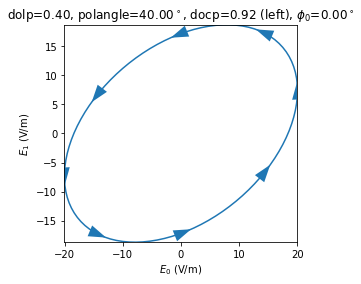

In [2]:
# Define incident intensity and polarization
intensity = 1 # W/m^2
dolp = 0.4 # degree of linear polarization (in [0,1])
polangle = 40 # angle of semi-major axis with respect to the horizontal direction (in [-90,90])
handedness = "left"
phase0 = 0 # phase of V0 in degrees

# Describe with Jones' formalism because fully polarized
J1 = polarization.Jones.from_params(intensity=intensity,dolp=dolp,polangle=polangle,\
                                    handedness=handedness,phase0=phase0)

# We're looking upstream:
J1.plot_efield()

plt.show()

## Partially polarized
Plot the electric field vector in a plane perpendicular to the propagation direction:

Intensity: 0.9 (pol, W/m^2), 0.1 (unpol, W/m^2)


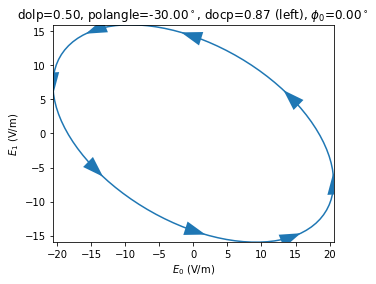

In [3]:
# Define incident intensity and polarization
intensity = 1 # W/m^2
dop = 0.9 # degree of polarization (in [0,1])
dolp = 0.5*dop # degree of linear polarization (in [0,dop])
polangle = -30 # angle of polarization ellipse with respect to the horizontal direction (in [-90,90])
handedness = "left"

# Describe with Stokes' formalism because not fully polarized
S1 = polarization.Stokes.from_params(intensity=intensity,dop=dop,dolp=dolp,\
                                    polangle=polangle,handedness=handedness)

# Plot the polarized component:
print("Intensity: {} (pol, W/m^2), {} (unpol, W/m^2)".format(S1.intensity_polarized,S1.intensity_unpolarized))
S1.decompose()["pol"].plot_efield()
plt.show()

## Thomson scattering

The scattering direction defined by the wave vector $\vec{k}_\mathrm{sc}$ in the coordinate system of the primary beam $\vec{k}$:

$$
\begin{equation}
\begin{split}
\hat{k}_\mathrm{sc}\cdot\hat{e}_0 =& \cos\phi\sin\theta\\
\hat{k}_\mathrm{sc}\cdot\hat{e}_1 =& \sin\phi\sin\theta\\
\hat{k}_\mathrm{sc}\cdot\hat{e}_2 =& \cos\theta\\
\end{split}
\end{equation}
$$

If we define the reference frame of the scattered beam as
$$
\begin{equation}
\begin{split}
\hat{e}_2^\prime =& \hat{k}_\mathrm{sc}\\
(\hat{k}_\mathrm{sc}\times\hat{k})\cdot\hat{e}_0^\prime=1\\
\hat{e}_1^\prime =&\hat{e}_2^\prime\times\hat{e}_0^\prime
\end{split}
\end{equation}
$$

which means that $\hat{e}_0^\prime$ is prependicular to the scattering plane defined by $\hat{k}_\mathrm{sc}$ and $\hat{k}$, then the Stokes parameters after Thomson scattering can be expressed in this reference frame as

$$
\begin{equation}
\begin{split}
S_{sc}=&M\cdot S\\
M =& \begin{bmatrix}
a&(1-a)\cos2\beta&-(1-a)\sin2\beta&0\\
(1-a)&a\cos2\beta&-a\sin2\beta&0\\
0&\cos\theta\sin2\beta&\cos\theta\cos2\beta&0\\
0&0&0&\cos\theta
\end{bmatrix}\\
\beta=&\frac{\pi}{2}-\phi=\hat{e}_0\cdot\hat{e}_0^\prime\\
a=&\frac{1+\cos^2\theta}{2}
\end{split}
\end{equation}
$$

Incident intensity: 1.0 W/m², 1.0 W/m²
Diffracted intensity: 0.193582222752 W/m², 0.377432889101 W/m²
Incident dop: 1, 0.4
Diffracted dop: 1, 1.0

Incident beam (polarized component):


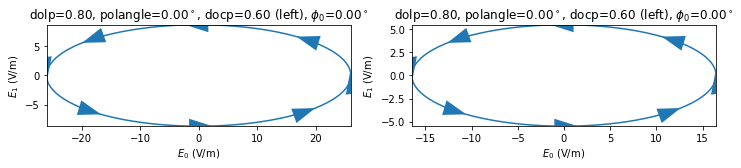

Diffracted beam (polarized component in diffraction reference frame):


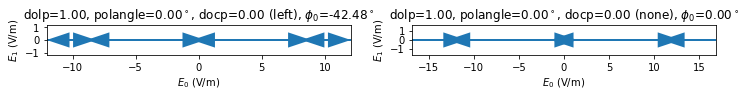

In [4]:
reload(polarization)

# Define incident intensity and polarization
intensity = 1 # W/m^2
dop = 0.4 # degree of polarization (in [0,1])
dolp = 0.8*dop # degree of linear polarization (in [0,dop])
polangle = 0 # angle of polarization ellipse with respect to the horizontal direction (in [-90,90])
handedness = "left"

# Fully polarized
J1 = polarization.Jones.from_params(intensity=intensity,dolp=dolp/dop,\
                                    polangle=polangle,handedness=handedness)

# Partially polarized
S1 = polarization.Stokes.from_params(intensity=intensity,dop=dop,dolp=dolp,\
                                    polangle=polangle,handedness=handedness)

# Scattering direction: spherical coordinates
azimuth = 20
polar = 90 # scattering angle

J3 = J1.thomson_scattering(azimuth,polar)
S3 = S1.thomson_scattering(azimuth,polar)

print("Incident intensity: {} W/m², {} W/m²".format(J1.intensity,S1.intensity))
print("Diffracted intensity: {} W/m², {} W/m²".format(J3.intensity,S3.intensity))
print("Incident dop: {}, {}".format(J1.dop,S1.dop))
print("Diffracted dop: {}, {}".format(J3.dop,S3.dop))

# We're looking upstream:
fig,axs = plt.subplots(1,2,figsize=(12,8))

print("\nIncident beam (polarized component):")
plt.sca(axs[0])
J1.plot_efield()
if S1.dop==0:
    axs[1].set_aspect('equal')
    axs[1].axis('off')
else:
    plt.sca(axs[1])
    S1.decompose()["pol"].plot_efield()
plt.show()

fig,axs = plt.subplots(1,2,figsize=(12,8))

print("Diffracted beam (polarized component in diffraction reference frame):")
plt.sca(axs[0])
J3.plot_efield()
if S3.dop==0:
    axs[1].set_aspect('equal')
    axs[1].axis('off')
else:
    plt.sca(axs[1])
    S3.decompose()["pol"].plot_efield()

plt.show()


Incident beam (polarized component):


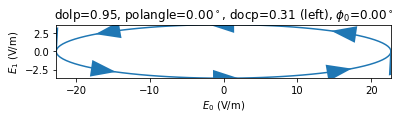

Incident intensity: 1.0 W/m²
Scattered intensity (phi=0deg,theta=90deg) = 0.1675 W/m²
Scattered intensity (phi=90deg,theta=90deg) = 0.8325 W/m²


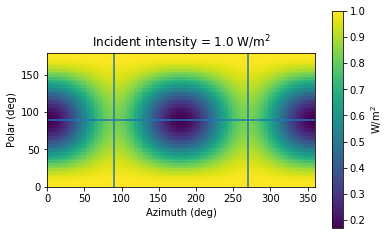

In [5]:
reload(polarization)

# Define incident intensity and polarization
intensity = 1 # W/m^2
dop = 0.7 # degree of polarization (in [0,1])
dolp = 0.95*dop # degree of linear polarization (in [0,dop])
polangle = 0 # angle of polarization ellipse with respect to the horizontal direction (in [-90,90])
handedness = "left"

S1 = polarization.Stokes.from_params(intensity=intensity,dop=dop,dolp=dolp,\
                                    polangle=polangle,handedness=handedness)

if S1.dop!=0:
    print("\nIncident beam (polarized component):")
    S1.decompose()["pol"].plot_efield()
    plt.show()
    
azimuth = np.linspace(0,360,100)
polar = np.linspace(0,180,50)
extent = [azimuth[0],azimuth[-1],polar[0],polar[-1]]
azimuth,polar = np.meshgrid(azimuth,polar)

print("Incident intensity: {} W/m²".format(S1.intensity))
print("Scattered intensity (phi=0deg,theta=90deg) = {} W/m²".format(S1.thomson_intensity(0,90)))
print("Scattered intensity (phi=90deg,theta=90deg) = {} W/m²".format(S1.thomson_intensity(90,90)))

img = S1.thomson_intensity(azimuth,polar)
plt.imshow(img,origin="lower",extent=extent)
plt.axhline(y=90)
plt.axvline(x=90)
plt.axvline(x=270)
plt.xlabel("Azimuth (deg)")
plt.ylabel("Polar (deg)")
plt.title("Incident intensity = {} W/m$^2$".format(S1.intensity))
plt.colorbar(label="W/m$^2$")
plt.show()

The Thomson cross-section can be written as

$$
\begin{equation}
\begin{split}
\frac{d\sigma_T}{d\Omega} =& r_e^2\frac{I_{sc}(\phi,\theta)}{I_0}\\
=&r_e^2 K(\phi,\theta)\\
\sigma_T =& r_e^2\int_0^{2\pi}\int_0^\pi K(\phi,\theta) \sin\theta d\theta d\phi\\
=&\frac{8\pi}{3}r_e^2
\end{split}
\end{equation}
$$


In [6]:
from scipy import integrate

K = S1.thomson_K
integrand = lambda azimuth,polar: K(azimuth,polar)*np.sin(polar)

thomsonsc = integrate.dblquad(integrand, 0, np.pi, lambda x:0, lambda x:2*np.pi)[0]
print(thomsonsc,8*np.pi/3) # units of r_e^2

(8.377580409572783, 8.377580409572781)
